# Библиотеки Python для DS (семинары)

Урок 3. Практическая работа. Построение модели Линейной регрессии

В качестве датасета используется набор данных о жилищных условиях и ценах на жилье в Калифорнии (California housing dataset), доступный в библиотеках Python (например, sklearn.datasets).

Анализ и подготовка данных:

1. Загрузите датасет California housing dataset.

2. Выполните базовый анализ данных: вывод размера выборки, проверка на пропущенные значения, статистический анализ числовых переменных.

3.  Визуализируйте распределения нескольких выбранных числовых переменных и корреляции между ними.

Построение модели линейной регрессии:

4. Разделите данные на обучающий и тестовый набор в соотношении 80/20.

5. Используйте только две переменные (по вашему выбору) для построения модели линейной регрессии. Обоснуйте ваш выбор.

6. Постройте модель линейной регрессии, обучите ее на обучающем наборе и сделайте предсказания на тестовом.

7. Оцените качество модели с помощью подходящих метрик (R2, MSE, MAE).

8. Проведите эксперименты с различными признаками, попробуйте увеличить количество признаков и сравните с базовыми метриками.

## Выполнение домашней работы

In [2]:
# Библиотеки для работы с датасетом и графиками
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##### 1. Загрузите датасет California housing dataset.

In [4]:
# Скачиваем датасет
from sklearn.datasets import fetch_california_housing
hous = fetch_california_housing()

# Создание DataFrame из данных
df_hous = pd.DataFrame(data=hous.data, columns=hous.feature_names)

# Добавление целевой переменной
df_hous['MedHouseVal'] = hous.target

# Сохранение DataFrame в CSV файл
df_hous.to_csv('california_housing.csv', index=False)

##### 2. Выполните базовый анализ данных: вывод размера выборки, проверка на пропущенные значения, статистический анализ числовых переменных.

In [5]:
# Выводим дата фрейм
df_hous.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Этот фрейм данных содержит следующие столбцы:

1. MedInc (Средний доход населения в квартале)
2. HouseAge (Средний возраст дома в квартале)
3. AveRooms (Средние количество команат)
4. AveBedrms (Средние количество спален)
5. Population (Население квартала)
6. AveOccup (Средняя заполняемость дома)
7. Latitude (Широта жилого квартала)
8. Longitude (Долгота жилого квартала)
9. MedHouseVal (Средняя цена дома)

In [6]:
# Выводим общую информацию
df_hous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
# Смотрим тип данных
df_hous.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Из общей информации следует:
1. Всего 8 колонок
2. Нулевые значения отсуствуют
3. Нет пропущеных записей в колонках
4. Все колонки находятся в дробных float64 значениях

Статистический анализ объектных переменных не проводим так как их нет в данном датасете и нам не нужно их назначать согласно задания

In [8]:
# Статистический анализ числовых переменных
df_hous.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. MedInc (Средний доход населения в квартале): 
- Средний общий рейтинг на уровне 3.53
- Миниманая 0.49
- Максимальная 15.00
- Медиана равна 3.87
- Отклонение состовляет 1.89
2. HouseAge (Средний возраст дома в квартале):
- Средние Счёт/Оценка, счастья на уровне 29.00
- Миниманая 1.00
- Максимальная 52.00
- Медиана равна 28.63
- Отклонение состовляет 12.58
3. AveRooms (Средние количество команат):
- Средние значение ВВП на душу населения на уровне 5.22
- Миниманая 0.84
- Максимальная 141.90
- Медиана равна 5.42
- Отклонение состовляет 2.47
4. AveBedrms (Средние количество спален):
- Средние социальной поддержки на уровне 1.04
- Миниманая 0.33
- Максимальная 34.06
- Медиана равна 1.09
- Отклонение состовляет 0.47
5. Population (Население квартала):
- Средние значение продолжительность здоровой жизни на уровне 1166.00
- Миниманая 3.00
- Максимальная 35682.00
- Медиана равна 1425.47
- Отклонение состовляет 1132.46
6. AveOccup (Средняя заполняемость дома):
- Средние значение Свободы выбора в жизни на уровне 2.81
- Миниманая 0.69
- Максимальная 1243.33
- Медиана равна 3.07
- Отклонение состовляет 10.38
7. Latitude (Широта жилого квартала):
- Средние значение щедрости на уровне 34.26
- Миниманая 32.54
- Максимальная 41.95
- Медиана равна 35.63
- Отклонение состовляет 2.13
8. Longitude (Долгота жилого квартала):
- Средние значение Восприятие корупции на уровне -118.49
- Миниманая -124.35
- Максимальная -114.31
- Медиана равна -119.56
- Отклонение состовляет 2.00
9. MedHouseVal (Средняя цена дома)
- Средние значение Восприятие корупции на уровне 1.79
- Миниманая 0.14
- Максимальная 5.00
- Медиана равна 2.06
- Отклонение состовляет 1.15

##### 3.  Визуализируйте распределения нескольких выбранных числовых переменных и корреляции между ними.

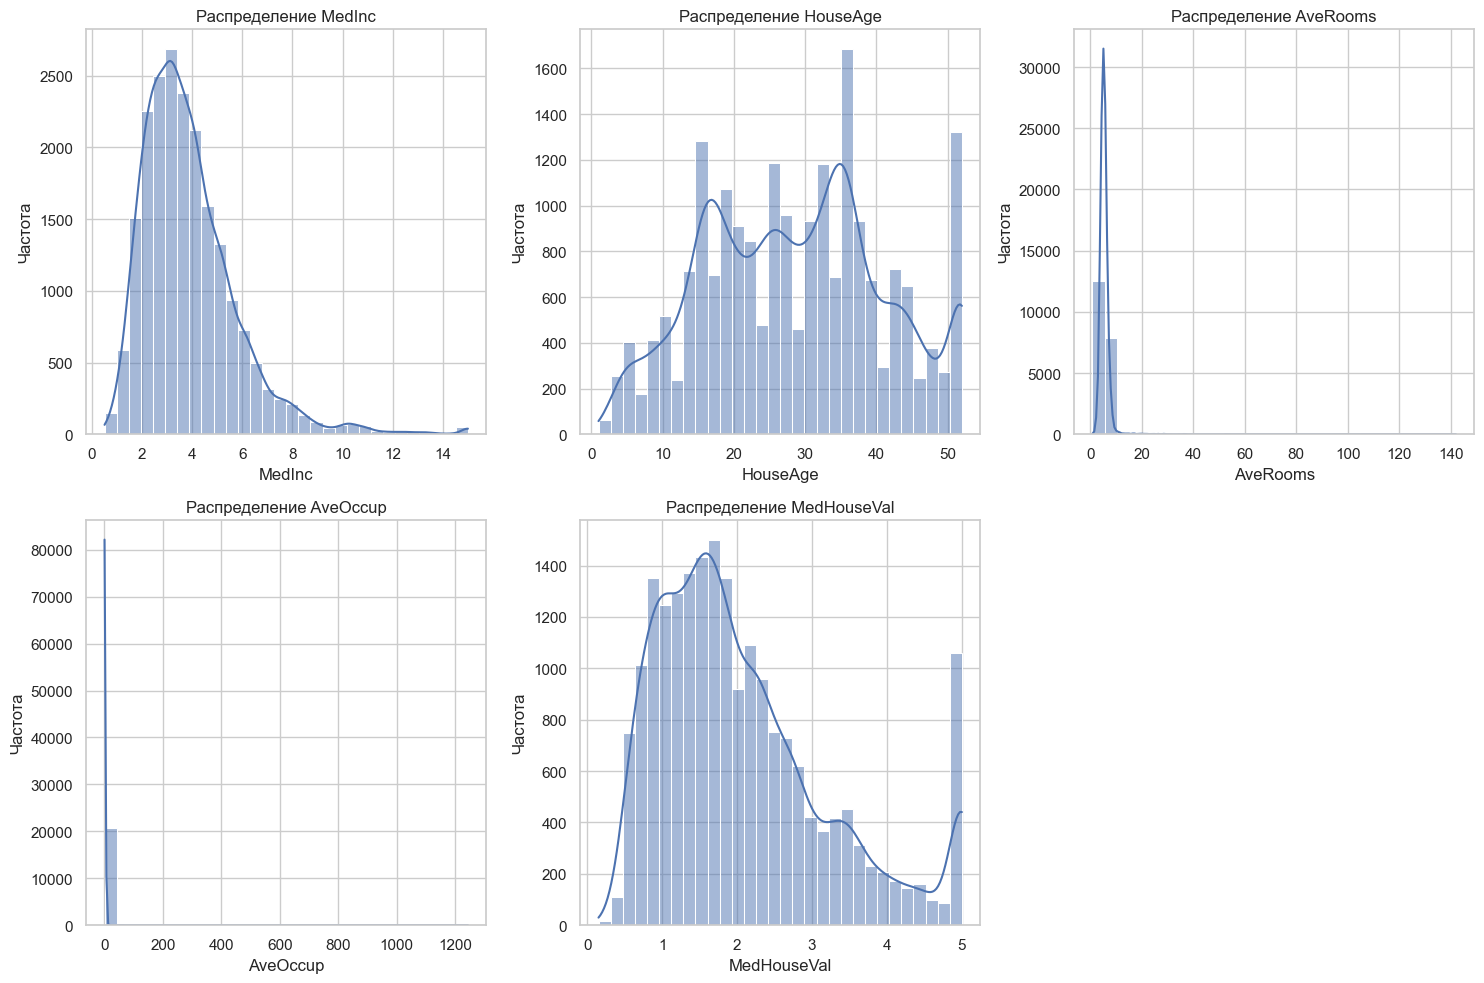

In [9]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Визуализация распределения нескольких выбранных числовых переменных
selected_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']

plt.figure(figsize=(15, 10))

for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_hous[column], kde=True, bins=30)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

1. График имеет положительный смещённый влево характер это указывает, что большинство семей имеет небольшой доход.
Присуствует один пик от 2 до 4 показывающий наибольшие количество жителей в рамках этого дохода. 
2. График имеет положительный равномерный немного плавающий рост показывающий, показывающий разнообразие в постройки по годам домов.
Присуствуют два пика и два провала, пики показывают, самый большой пик это от 30 до 38 лет, что говорит, что страные дома преобладают однако есть пик в от 15 до 18 лет, говорящий, что в районе есть и новые дома. Однако между этими пиками есть два провала в диапазоне 19 лет, что говорит отом, что жители в данным возрате продают дом или сносят его. И опять же потом идёт небольшой подъём с 22 годовалых домов и просадка на 27 летних домах.
3. График имеет сильный смещённый в лево и положительный характер указывающий, что жителям нравятся небольшое количество комнат, однако по графику видно, что в районе есть некоторое единичное количество больших домов и особняков.
На графике имеется один сильный пик который говорит о том, что 2-4 комнаты является основной предпочитаемой планировкой.
4. График имеет короткий резкий рост указывающий, что абсолютное большинство имеют не более 1-2 спален в доме, все остальное количество спален представлено в редких случая.
5. График имеет положительный равномерный рост указывающий, что большинство домов имеют низкую стоимость, это могут быть дома для временной аренды или старые дома под продажу исходя из графиков выше.
График имеет два пика один в районе от 0,5 до 1,8 это указывает на большое количество дешёвого жилья и второй большой пик от 5, что показывает, что в квартале много догорогово элитного жилья.


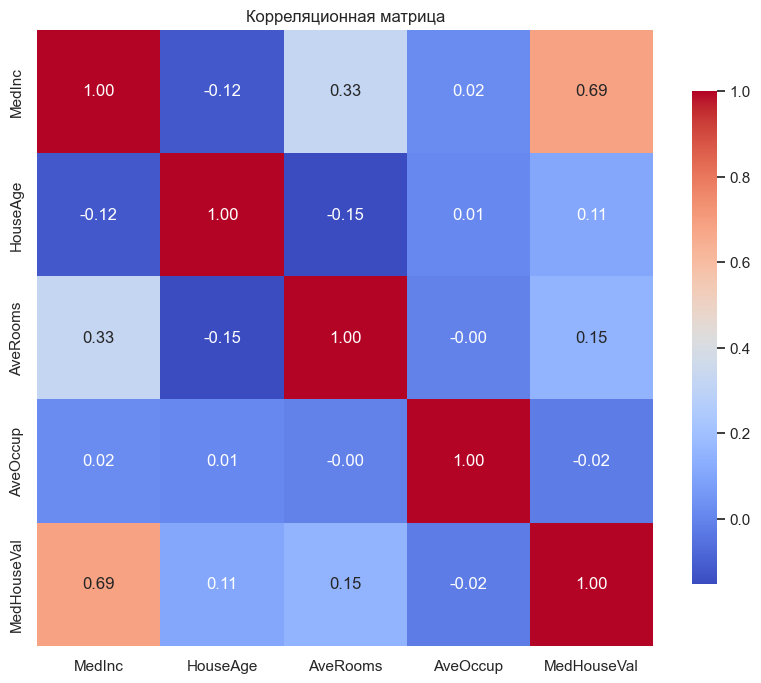

In [10]:
# Визуализация корреляции между выбранными переменными
correlation_matrix = df_hous[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица')
plt.show()

Сильная положительные корреляции MedInc и MedHouseVal указывает на то, что увеличение дохода ведет к увеличению стоимости жилья, так же есть слабая положительная корелляция по AveRooms, что может указывать, что количество комнат влияет на увеличение стоимости.

Сильная отрицательная корреляция между AveOccup и MedHouseVal указывает на то, что более высокое количество жильцов связано с более низкой стоимостью жилья, что может быть связано с тем, что более доступные дома часто занимают больше жильцов, так же отрицательная корелляция HouseAge указывает, что возраст дома не влияет на количество комнат.

Значения, близкие к нулю, указывают на отсутствие значимой связи между переменными между HouseAge и AveOccup близка к 0, это может означать, что возраст дома не влияет на количество жильцов а так же AveRooms, что количество комнат также не влияет.

##### 4. Разделите данные на обучающий и тестовый набор в соотношении 80/20.

In [11]:
# Разделение данных на обучающий и тестовый набор
X = df_hous[['MedInc', 'HouseAge']]
y = df_hous['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (16512, 2)
Размер тестового набора: (4128, 2)


##### 5. Используйте только две переменные (по вашему выбору) для построения модели линейной регрессии. Обоснуйте ваш выбор.

 В качестве целевой переменной будем использовать MedHouseVal, а для входных признаков выберем MedInc (средний доход) и HouseAge (возраст дома). Исходя из графиков они должны оказывать основной фактор влияния на цену дома. Поскольку новые дома могут стоить дороже чем старые в зависимости от состояния а средний доход обычно сильно влиет на стоимость жилья.

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
    \nMAE :{mean_absolute_error( y_train, y_train_pred)},\
    \n R2: {r2_score(y_train, y_train_pred)}')

MSE: 0.6513066873616399,
MAE :0.6025650725820443,
 R2: 0.51277879784576


##### 6. Постройте модель линейной регрессии, обучите ее на обучающем наборе и сделайте предсказания на тестовом.

In [13]:
from sklearn.linear_model import LinearRegression

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающем наборе
model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

print("Предсказанные значения:", y_pred)

Предсказанные значения: [1.05551637 1.5113978  2.30731557 ... 4.32725202 1.72627159 1.72652128]


##### 7. Оцените качество модели с помощью подходящих метрик (R2, MSE, MAE).

In [19]:
# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse},\
      \n MAE: {mae},\
      \n R2: {r2}')

MSE: 0.6629874283048177,      
 MAE: 0.6059780051879192,      
 R2: 0.4940606792889837


##### 8. Проведите эксперименты с различными признаками, попробуйте увеличить количество признаков и сравните с базовыми метриками.

In [23]:
# Добавление дополнительных признаков и новое разделение данных
X = df_hous[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']]
y = df_hous['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели с новыми признаками
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Оценка качества модели
mse_new = mean_squared_error(y_test, y_pred)
mae_new = mean_absolute_error(y_test, y_pred)
r2_new = r2_score(y_test, y_pred)

print(f'С новыми признаками:')
print(f'MSE: {mse_new},\
    \n MAE: {mae_new},\
    \n R2: {r2_new}')

С новыми признаками:
MSE: 0.657451727882265,      
 MAE: 0.6025480268339906,      
 R2: 0.49828508595474374


До обучения:
MSE: 0.6513066873616399,
MAE :0.6025650725820443,
R2: 0.51277879784576

После обучения:
MSE: 0.6629874283048177,
MAE: 0.6059780051879192,
R2: 0.4940606792889837

После обучения с дополнительными данными:
MSE: 0.657451727882265,
MAE: 0.6025480268339906,
R2: 0.49828508595474374

После обучения модель показала увеличение как MSE, так и MAE, что указывает на ухудшение предсказательной способности модели по сравнению с начальным состоянием может быть признаком переобучения. Использование дополнительных данных не привело к значительному увелечениею, но немного лучше чем модель до обучения. Показатель R2 снизился после обучения, что говорит о том, что модель стала хуже объяснять вариации в целевой переменной. Итог модель не улучшила свои способности обучения требуется провести дополнительные шаги для её улучшения, выбрать другие признаки или целевую.